In [1]:
# standard libraries for plotting and python
import numpy as np
import matplotlib.pyplot as plt
import sys
import seaborn as sns # for colors 

# add here the pathname to the BHNS github repo, 
# this directory should have the name 'BlackHole-NeutronStar' if you git cloned it
# adds the path to the python functions that we will use 
sys.path.append('../../Scripts')  
from PostProcessingScripts import * # scripts with post-processing functions
import ClassMSSFR   # for cosmic integration (SFRD) scripts 


../../Scripts/PostProcessingScripts.py:25: MatplotlibDeprecationWarning: Support for setting the 'text.latex.preamble' or 'pgf.preamble' rcParam to a list of strings is deprecated since 3.3 and will be removed two minor releases later; set it to a single string instead.
  matplotlib.rcParams['text.latex.preamble'] = [r'\boldmath']
../../Scripts/PostProcessingScripts.py:44: MatplotlibDeprecationWarning: Support for setting the 'text.latex.preamble' or 'pgf.preamble' rcParam to a list of strings is deprecated since 3.3 and will be removed two minor releases later; set it to a single string instead.
  matplotlib.rcParams['text.latex.preamble']=[r"\usepackage{amsmath}"]
../../Scripts/PostProcessingScripts.py:45: MatplotlibDeprecationWarning: Support for setting the 'text.latex.preamble' or 'pgf.preamble' rcParam to a list of strings is deprecated since 3.3 and will be removed two minor releases later; set it to a single string instead.
  matplotlib.rcParams['text.latex.preamble'] = [r'\bol

# make Figure B1a 

warning no normalisation of mass evolved assuming 1


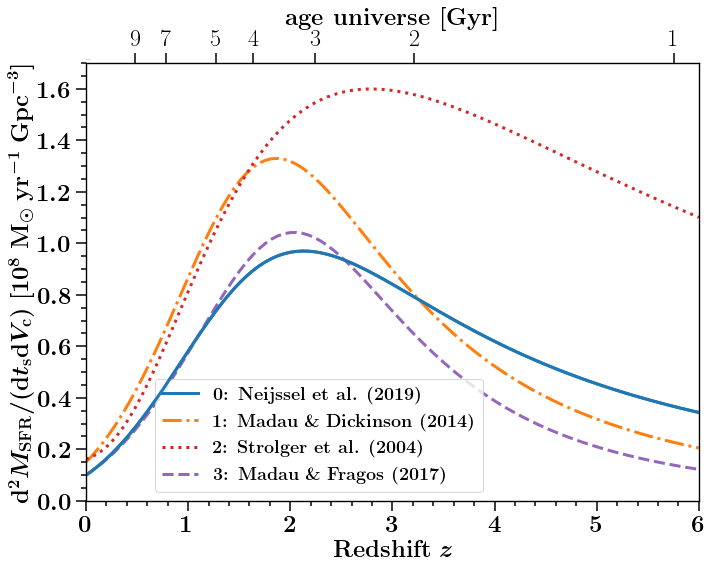

In [2]:
metallicityGrid = np.logspace(-4, -1.5,100)
MSSFR = ClassMSSFR.MSSFR(metallicityGrid=metallicityGrid)

# fontsize
fs = 20

clist=['#1f77b4', '#ff7f0e', '#d62728', '#9467bd'] 
#Plotting the SFR prescriptions
redshifts = np.linspace(0,6,100)
#strolger works in age not redshift
ages      = MSSFR.cosmology.age(redshifts).value

fig, axes = plt.subplots(1,1, figsize=(10,8))
axes.plot(redshifts, MSSFR.SFR_Neijssel(redshifts), c=clist[0], lw=3., label=r'\textbf{0: Neijssel et al. (2019)}', linestyle='-')
axes.plot(redshifts, MSSFR.SFR_Madau(redshifts),    c=clist[1], lw=3., label=r'\textbf{1: Madau }$\&$ \textbf{Dickinson (2014)}', linestyle='-.')
axes.plot(redshifts, MSSFR.SFR_Strolger(ages),      c=clist[2], lw=3., label=r'\textbf{2: Strolger et al. (2004)}', linestyle=':')
axes.plot(redshifts, MSSFR.SFR_Madau2(redshifts),   c=clist[3], lw=3., label=r'\textbf{3: Madau }$\&$ \textbf{Fragos (2017)}', linestyle='--')


# axes and legend layout 
nameX = r'\textbf{Redshift} $z$'
nameY = r'$ {\rm{d}}^2M_{\rm{SFR}}/({\rm{d}}t_{{\rm{s}}}{\rm{d}}V_{\rm{c}}) \   [10^8\ {\rm{M}}_{\odot}\  {\rm{yr}}^{-1}\ {\rm{Gpc}}^{-3}]$'
axes.legend(loc=8, prop={'size':18}, bbox_to_anchor=(0.38, 0))
axes.yaxis.offsetText.set_fontsize(0.1)
axes.set_ylim(0, 1.7*10**8)
axes.set_xlabel(nameX, fontsize=fs+4)
axes.set_ylabel(nameY, fontsize=fs+4)
axes.tick_params(labelsize=fs+4)
axes.set_xlim(0,6)
layoutAxes(axes, nameX=nameX, nameY=nameY, fontsize=fs+4)


### second axis for age ###
axes2  = axes.twiny()
axes2.plot(redshifts, MSSFR.SFR_Neijssel(redshifts), c=clist[0], lw=3., label='Preferred model')
#find nearest redshift to age
agelabels = np.array([1,2,3,4,5,7, 9]) #Gyr
ageUniverse = MSSFR.cosmology.age(0)
redshiftTicks = np.zeros(len(agelabels))
for nr, age in enumerate(agelabels):
    distance = np.abs(ages-age)
    ind      = np.where(distance==np.min(distance))[0][0]
    redshiftTicks[nr] =  redshifts[ind]

axes2.set_xticks(redshiftTicks)
axes2.set_xticklabels(agelabels)
nameX2 = r'\textbf{age universe [Gyr]}'

axes2.set_xlabel(nameX2, fontsize=fs+4)
axes2.tick_params(labelsize=fs+4)
layoutAxes(axes2, nameX=nameX2, nameY=None, fontsize=fs+4, setMinor=False)
axes2.set_xlim(0,6)
##

# save and show 
plt.tight_layout()
plt.savefig('./SFRplot.png', dpi=600,bbox_inches='tight')
plt.savefig('./SFRplot.pdf',bbox_inches='tight')
plt.show()

# make Figure B1b

warning no normalisation of mass evolved assuming 1


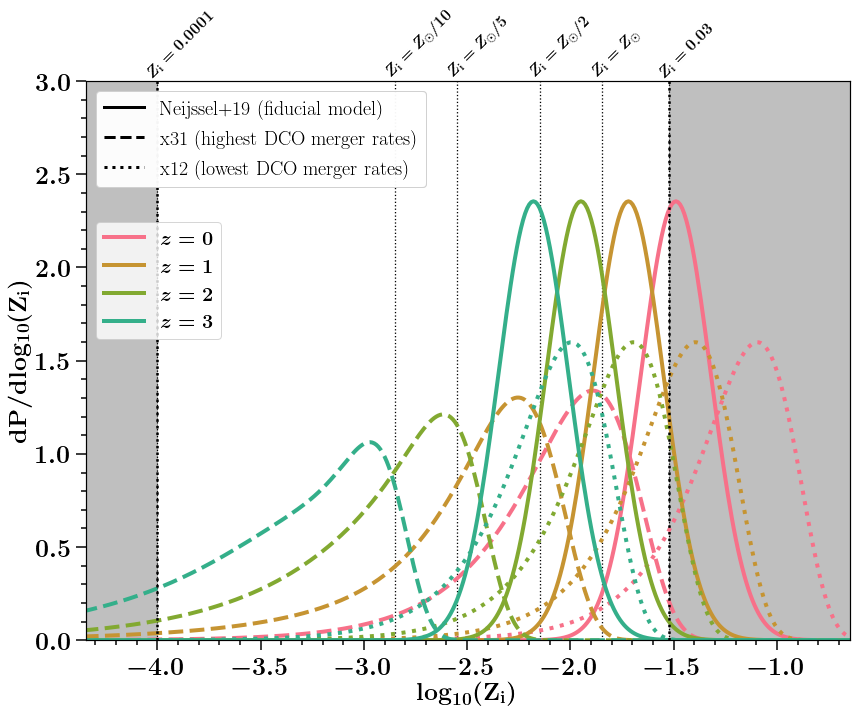

In [3]:
metallicityGrid = np.logspace(-4, -1.5,100)
mssfr = ClassMSSFR.MSSFR(metallicityGrid=metallicityGrid)

#.            FIDUCIAL                    HIGHEST.                        LOWEST 
method     = ['logNormal'                ,'MZ_GSMF'                     ,'MZ_GSMF'] #                      , 'MZ_GSMF'                    , 'MZ_GSMF'  ]
SFRs       = ['Neijssel et al. (2019)'   ,'Madau et al. (2014)'         ,'Madau et al. (2014)']#          , 'Madau et al. (2014)'        , 'Madau et al. (2014)']
logNormal  = ['Neijssel Phenomenological', None                         , None                  ]#        , None                         , None]
GSMFs      = [None                       ,'Furlong et al. (2015) Double', 'Panter et al. (2004) Single']#, 'Panter et al. (2004) Single', 'Furlong et al. (2015) Single']
MZs        = [None                       , 'Langer et al. (2006)'       , 'Langer et al. +offset (2006)'        ]#, 'Ma et al. (2015)'           , 'Ma et al. (2015)']

linestyles = ['-'                        , '--'                         , ':'                           ]#, '-.'                         , '-.']
labels     = ['Neijssel+19 (fiducial model)'                 , r'x31 (highest DCO merger rates)'              , 'x12 (lowest DCO merger rates)']#, 'Ma et al. (2015)'           , 'Ma 2']


cm       = plt.get_cmap('viridis')
nColors  = 8+1  #want three colours for three variations (1 used in other plot later)
                    # dont want the brigthest colour hence I add a dummy value.
                    #Should be consistent with figure of metallicity PDFs
mycolors = [cm(x) for x in np.linspace(0,1 , nColors)]

colours  =  [ 'b'                        ,mycolors[0]                   , mycolors[1]       \
             , mycolors[2], mycolors[3]]

solar=0.0142

redshifts = [0, 1, 2, 3, 4, 5, 6, 7]
zcolors       = sns.color_palette("husl", len(redshifts))
redshifts         = [0, 2, 4]
labelsZ = [r'$z=0 $',r'$z=1$', r'$z=2$']
alphas = [1.0, 0.6, 0.3]
redshifts=[0,1,2,3]
zcolors       = sns.color_palette("husl", 7)

fig, axes = plt.subplots(1,1, figsize=(12,10))
zBins = np.logspace(-8,2.,1000)
center = (zBins[1:] + zBins[:-1])/2.
width  = np.diff(np.log10(zBins))

handles1 = []
for nrz, redshift in enumerate(redshifts):
    for nrL, L in enumerate(labels[0:]):
        PDF = np.zeros(len(center))
        mssfr.Zprescription         = method[nrL]
        mssfr.SFRprescription       = SFRs[nrL]
        mssfr.logNormalPrescription = logNormal[nrL]
        mssfr.GSMFprescription      = GSMFs[nrL]
        mssfr.ZMprescription        = MZs[nrL]
        #code is done such that we have to do it per metallicity
        for nrZ, Z in enumerate(center):
            Zlower   = zBins[nrZ]
            Zupper   = zBins[nrZ+1]
            if method[nrL] == 'logNormal':
                PDF[nrZ] = mssfr.returnFractionLogNormal(Zlower, Zupper, redshift)
            if method[nrL] == 'MZ_GSMF':
                PDF[nrZ] = mssfr.returnFractionMZ_GSMF(Zlower, Zupper, [redshift])
        PDF = np.divide(PDF, width)
        if nrL==0:
            label = r'$z=%s$'%redshift #labelsZ[nrz]  #+'  '+'  z='+str(redshift[0])
            ll    = True
        else:
            label = None
            ll    = False
        if ll:
            l = axes.plot(np.log10(center), PDF,  color=zcolors[redshift], \
                  label=label, lw=4, alpha=1, linestyle=linestyles[nrL], zorder=2)
            handles1.extend(l)
        else:
            axes.plot(np.log10(center), PDF,  color=zcolors[redshift], \
                  label=label, lw=4, alpha=1, linestyle=linestyles[nrL], zorder=2)

first_legend = axes.legend(handles=handles1, loc=3,  prop={'size':20}, ncol=1, bbox_to_anchor=(0., .52))   
axes.add_artist(first_legend) 
      
    
top_y=3    

nameX = r'$\rm \log_{10}(Z_{\rm{i}})$'
nameY = r'$\rm dP / dlog_{10}(Z_{\rm{i}}) $'
# nameY = r'${\rm{d}}M_{\rm{SFR}} / \rm{d}\log_{10}(Z/Z_{\odot}) $'
for Z in [0.0001, 0.03]:
    N=10
    if Z==metallicityGrid[0]:
        x=np.linspace(np.log10(min(zBins)), np.log10(Z), N)
    else:
        x=np.linspace(np.log10(Z), np.log10(max(zBins)), N)
    y_low = np.zeros(N)
    y_high = np.ones(N)*(top_y+1)
    
    axes.fill_between(x=x,y1=y_low, y2=y_high, alpha=0.5, zorder=0, color='gray' )
    axes.axvline(np.log10(Z), c='k', linestyle=':', lw=2.5)

    
#again a fudge for second legend
handles2 = []

for nrL, label in enumerate(labels):
    #draw a line outside plot area
    line, = axes.plot([1, 2],[-1, -2], c='k', alpha=1, lw=3., label=labels[nrL], linestyle=linestyles[nrL])
    handles2.extend([line])

second_legend = axes.legend(handles=handles2, loc=2,  prop={'size':20}, ncol=1)   
axes.add_artist(second_legend)    


# plot Z values for some fixed metallicities
text_list = [r'$Z_{\rm{i}}=Z_{\odot}$', r'$Z_{\rm{i}}=Z_{\odot}/2$', \
             r'$Z_{\rm{i}}=Z_{\odot}/5$',  r'$Z_{\rm{i}}=Z_{\odot}/10$',\
             r'$Z_{\rm{i}}=0.0001$', r'$Z_{\rm{i}}=0.03$' , r'$Z_{\rm{i}}=0.002$']    
for zz_ind, zz in enumerate([np.log10(solar), \
                             np.log10(0.5*solar),np.log10(0.2*solar), np.log10(0.1*solar), np.log10(0.0001),\
                             np.log10(0.03)]): #, np.log10(0.002)]) :
    axes.plot([zz,zz], [0,top_y+1], \
                     c='k',\
                     lw=1.3, alpha=1, linestyle=':', zorder=1)   
    axes.text(zz-0.06, top_y+0.01, s=text_list[zz_ind], fontsize=fs-4.5, verticalalignment='bottom', rotation=45)   






axes = layoutAxes(axes, nameX=nameX, nameY=nameY)
axes.set_ylim(bottom=0, top=top_y)
axes.set_xlim(np.log10((10**(-2.5))*solar), np.log10((10**(1.2))*solar))
plt.tight_layout()
plt.savefig('./ZvsPDF.png', dpi=600, bbox_inches='tight')
plt.savefig('./ZvsPDF.pdf',bbox_inches='tight')
plt.show()
plt.close()

# make Figure B1c

### first we define some functions for the Schechter functions, we define them here for ease
### then we plot the GSMF

In [4]:
#GSMF from panter et al 2004
#https://academic.oup.com/mnras/article/355/3/764/952806
#Used in Norman & Langer  2006
#http://iopscience.iop.org/article/10.1086/500363/meta
#Note that this is redshift independent!
logMc = np.log10(7.64*(10**10))
phi   = 7.8* (10**(-3)) 
alpha = -1.16




## GSMF from Baldry+2012: by Martyna: 

logMc_Baldry12 = np.log10(7.64*(10**10))
phi_Baldry12   = 7.8* (10**(-3)) 
alphaBaldry12 = -1.45




#From Furlong et al https://academic.oup.com/mnras/article-abstract/450/4/4486/1747992
#logMc defines the turnover between power law and exponential drop
#Reproducing figure A1

fitRedshifts   = np.array([0.1, 0.5, 1.0,2.0, 3.0, 4.0])
#fit values single schechter
logMc_s        = np.array([11.14, 11.11, 11.06, 10.91, 10.78, 10.60])
phi_s          = np.array([0.84, 0.84, 0.74, 0.45, 0.22, 0.12])*10**(-3)
a_s            = np.array([-1.43, -1.45, -1.48, -1.57, -1.66, -1.74])

#fit values double schechter
logMc_d     = np.array([10.95, 10.88, 10.74, 10.44, 10.19, 10.00])
phi1_d      = np.array([1.45, 1.61, 1.51, 1.06, 0.63, 0.24])*10**-3
a1_d        = np.array([-1.31, -1.24, -0.98, -0.25, 0.23, 0.43])
phi2_d      = np.array([0.0,  0.08,   0.48, 0.8, 0.61, 0.43])*10**-3
a2_d        = np.array([-2.22, -1.79, -1.62, -1.58, -1.64, -1.69])




def singleSchechterPerLog10(logM, logMc,  phi,  alpha):
    M  = 10**logM
    Mc = 10**logMc
    x  = M/Mc
    schechter = phi * ((x)**(alpha+1)) * np.exp(-x)
    return schechter


def doubleSchechterPerLog10FurlongLineair(logM, z):
    logMc, phi1, a1, phi2, a2, ratio = lineairFitDoubleSchechter(z)
    schechter = ((phi1*(10**((a1+1)*(logM-logMc)))) + (phi2*(10**((a2+1)*(logM-logMc)))))\
               *(np.exp(-pow(10,logM-logMc)))
    return schechter



def singleSchechterPerLog10FurlongLineair(logM, z):
    logMc, phi, alpha = lineairFitSingleSchechter(z)
    schechter = phi*(10**((alpha+1)*(logM-logMc)))*(np.exp(-pow(10,logM-logMc)))
    return schechter

In [5]:
#In Furlong et al they note that a double schechter function
#fits the data better at the high galaxy stellar masses (log10M > 11)
def lineairFitSingleSchechter(z):

    try:
        nr = len(z)
    except:
        z  = np.array([z])
        nr = 1
        
    fitlogMc        = np.array([11.14, 11.11, 11.06, 10.91, 10.78, 10.60])
    fitphi1          = np.array([0.84, 0.84, 0.74, 0.45, 0.22, 0.12])*10**(-3)
    fita1            = np.array([-1.43, -1.45, -1.48, -1.57, -1.66, -1.74])

    
    fitredshifts = np.array([0.1, 0.5, 1.0, 2.0, 3.0, 4.0])
    
    fitvalues = [fitlogMc, fitphi1, fita1]
    thresholds = [0.0, 0.5, 1.0, 2.0, 3.0, 10000000]
    r          = []
    for nrv, values in enumerate(fitvalues):
        dz     = np.diff(fitredshifts)
        dydz   = np.divide(np.diff(values), dz)
        yvalues= np.zeros(nr)
        for nrz, redshift in enumerate(thresholds[:-1]):
            mask = (z>= thresholds[nrz]) & (z<=thresholds[nrz+1])
            if nrz == 0 :
                #interpolate from z0.5 down
                dz   = 0.5 - z[mask]
                interpolatedValue  = values[nrz+1] - np.multiply(dz, dydz[nrz])
            else:
                #interpolate up
                dz   = z[mask] - redshift
                interpolatedValue  = values[nrz] + np.multiply(dz, dydz[nrz])
            yvalues[mask] =  interpolatedValue
        r.append(yvalues)
        
    r[1][r[1] <0] = 0  #phi1
    return r[0], r[1], r[2]



def lineairFitDoubleSchechter(z):

    try:
        nr = len(z)
    except:
        z  = np.array([z])
        nr = 1

    
    fitredshifts = np.array([0.1, 0.5, 1.0, 2.0, 3.0, 4.0])
    fitlogMc     = np.array([10.95, 10.88, 10.74, 10.44, 10.19, 10.00])
    fitphi1      = np.array([1.45, 1.61, 1.51, 1.06, 0.63, 0.24])*10**-3
    fita1        = np.array([-1.31, -1.24, -0.98, -0.25, 0.23, 0.43])
    fitphi2      = np.array([0.0,  0.08,   0.48, 0.8, 0.61, 0.43])*10**-3
    fita2        = np.array([-2.22, -1.79, -1.62, -1.58, -1.64, -1.69])
    
    ratioPhi1Phi2 = np.divide(fitphi2, fitphi1) #Do it in this order because phi2 is zero
    
    fitvalues  = [fitlogMc, fitphi1, fita1, fitphi2, fita2, ratioPhi1Phi2]
    thresholds = [0.0, 0.5, 1.0, 2.0, 3.0, 10000000]
    r          = []
    for nrv, values in enumerate(fitvalues):
        dz     = np.diff(fitredshifts)
        dydz   = np.divide(np.diff(values), dz)
        yvalues= np.zeros(nr)
        for nrz, redshift in enumerate(thresholds[:-1]):
            mask = (z>= thresholds[nrz]) & (z<=thresholds[nrz+1])
            if nrz == 0 :
                #interpolate from z0.5 down
                dz   = 0.5 - z[mask]
                interpolatedValue  = values[nrz+1] - np.multiply(dz, dydz[nrz])
            else:
                #interpolate up
                dz   = z[mask] - redshift
                interpolatedValue  = values[nrz] + np.multiply(dz, dydz[nrz])
            yvalues[mask] =  interpolatedValue
        r.append(yvalues)
        
    r[3][r[3]<0]  = 0  #phi2
    r[1][r[1] <0] = 0  #phi1
    r[4][r[4]<-2] = -2 #a2
    return r[0], r[1], r[2], r[3], r[4], r[5]


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:25: RuntimeWarning: divide by zero encountered in log10
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:25: RuntimeWarning: divide by zero encountered in log10
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:23: RuntimeWarning: divide by zero encountered in log10
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:25: RuntimeWarning: divide by zero encountered in log10


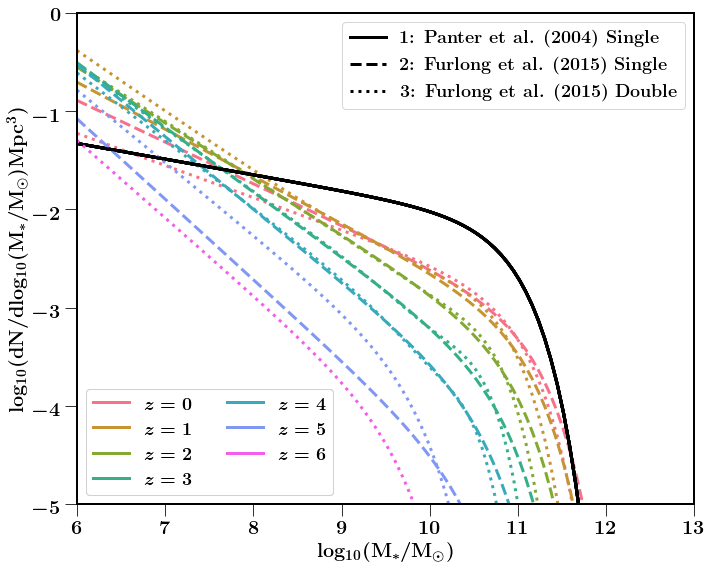

In [6]:

logM      = np.linspace(6,13,100)
redshifts = [0, 1, 2, 3, 4, 5, 6]
zcolors       = sns.color_palette("husl", len(redshifts))

#linestyle per redshift
linestyles= ['-', '--', ':']
alphas = [1,0.6,0.3]


PlotObservations =False

fig, axes = plt.subplots(1,1, figsize=(10,8))

for nrz, z in enumerate(redshifts):
    if nrz == 0:
        label1, label2, label3 = '1: Panter et al. (2004) Single',\
        '2: Furlong et al. (2015) Single','3: Furlong et al. (2015) Double'
    else:
        label1, label2, label3 = None, None, None
    Norman   = singleSchechterPerLog10(logM, logMc,  phi,  alpha)
    axes.plot(logM, np.log10(Norman), c='k', label=label1, lw=3,  linestyle=linestyles[0], alpha=alphas[0])
    Furlongsingle = singleSchechterPerLog10FurlongLineair(logM, z)
    axes.plot(logM, np.log10(Furlongsingle), c=zcolors[nrz], label=label2, lw=3,  linestyle=linestyles[1], alpha=alphas[0])
    FurlongDouble = doubleSchechterPerLog10FurlongLineair(logM, z)
    axes.plot(logM, np.log10(FurlongDouble), c=zcolors[nrz], label=label3, lw=3, linestyle=linestyles[2], alpha=alphas[0])
    
    
    if PlotObservations==True:
        if nrz<=3:
            axes.plot(xH15list[nrz], yH15list[nrz], c=zcolors[nrz], \
                      label=r'$z=%s$'%redshifts[nrz], markersize=10,  marker='v',markeredgecolor='k', alpha=alphas[0])

        

    
        
nameX = r'$\rm log_{10}(M_{*}/M_{\odot})$'
nameY = r'$\rm log_{10}( dN / dlog_{10}(M_*/M_{\odot})Mpc^{3})$'

#axes.set_yscale('log')
axes.set_ylim(bottom=-5, top=0)
axes.set_xlim(left=6, right=13)
# axes.legend(prop={'size': 18}, ncol=2)
axes.set_xlabel(nameX, fontsize=fs)
axes.set_ylabel(nameY, fontsize=fs)
axes.tick_params(labelsize=fs)





#again a fudge for second legend
handles2 = []
labels=[r'\textbf{1: Panter et al. (2004) Single}',\
        r'\textbf{2: Furlong et al. (2015) Single}',r'\textbf{3: Furlong et al. (2015) Double}']
for nrL, label in enumerate(labels):
    #draw a line outside plot area
    line, = axes.plot([1, 2],[-1, -2], c='k', alpha=1, lw=3., label=labels[nrL], linestyle=linestyles[nrL])
    handles2.extend([line])

second_legend = axes.legend(handles=handles2, loc=1,  prop={'size':18}, ncol=1)   
axes.add_artist(second_legend) 




#again a fudge for second legend
handles2 = []

for nrz, redshift in enumerate(redshifts):
    label = r'$z=%s$'%redshift
    #draw a line outside plot area
    line, = axes.plot([1, 2],[-1, -2], c=zcolors[nrz], alpha=1, lw=3., label=label, linestyle='-')
    handles2.extend([line])

second_legend = axes.legend(handles=handles2, loc=3,  prop={'size':18}, ncol=2)   
axes.add_artist(second_legend)   




plt.tight_layout()
plt.savefig('./GSMFplot.png', dpi=600,bbox_inches='tight')
plt.savefig('./GSMFplot.pdf',bbox_inches='tight')
plt.show()









# make Figure B1d

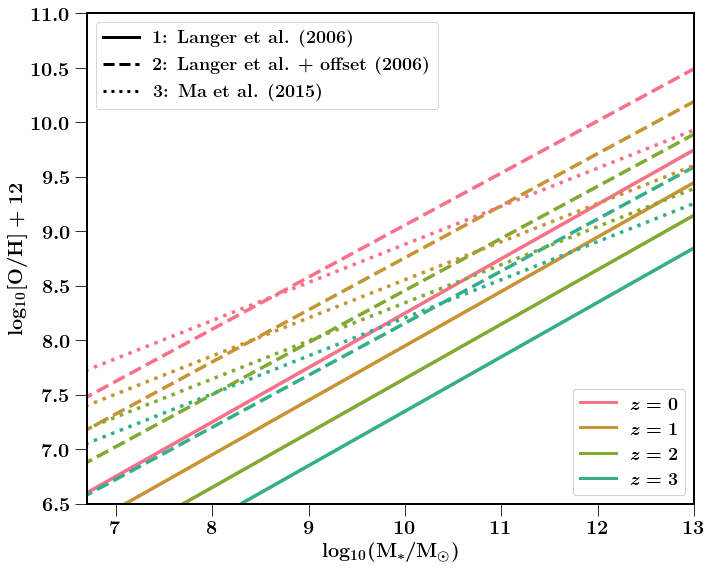

In [7]:
fs=20

MSSFR.logOH12sun            = 8.69    #fraction number density solar
MSSFR.solarMetallicity      = 0.0142  #fraction mass in metals solar, based on Asplund
clist=['#1f77b4', '#ff7f0e', 'k', '#bcbd22', '#17becf']

dictMZ      = {'3: Ma et al. (2015)':2,  '1: Langer et al. (2006)':0   ,\
               '2: Langer et al. + offset (2006)':1}

linestyles  = [':', '-', '-.', '-', '--', '-']
linestyles= ['-', '--', ':']

MZfunctions = [MSSFR.Langer2005MZ,  None, MSSFR.Ma2015MZ]

ZMfunctions = [MSSFR.Langer2005ZM,  MSSFR.Langer2005OffsetZM, MSSFR.Ma2015ZM]


logZZsun  = np.linspace(-3, 3, 100)
redshifts = [0, 1, 2, 3]#, 4, 5, 6, 7]
# redshifts = [0,2,4,6]
zcolors       = sns.color_palette("husl", 7)


plot      = ['1: Langer et al. (2006)', '2: Langer et al. + offset (2006)','3: Ma et al. (2015)']#,\
#              '3: Ma et al. (2015)']#

fig, axes = plt.subplots(1,1, figsize=(10,8))
logOH12sun  = 8.69
    
    
for prescription in plot:
    i         = dictMZ[prescription]
    plt.plot([-100, -40], [-100, -100],linestyle=linestyles[i], \
             lw=3.5, alpha=1, label=prescription, c='k')


for prescription in plot:
    i         = dictMZ[prescription]
    for zind, zz in enumerate(redshifts):

        logM      = ZMfunctions[i](10**logZZsun, zz)
        #I want to plot logOH12 not ZZsun
        logOH12   =  MSSFR.LogOH12vsLogZZsun(logZZsun, inValue='logZZsun')
        #to prevent overlapping dashed lines
        axes.plot(logM, logOH12, c=zcolors[zz],\
                  linestyle=linestyles[i], lw=3.5, alpha=1)  
    
    


axes.legend(loc=2, prop={'size':18}, ncol=1)
axes.set_ylim(6.5, 11)
    
axes.set_xlim(6.7,13)

nameX = r'$\rm log_{10}(M_{*}/M_{\odot})$'
nameY = r'$\rm log_{10}[O/H]+12$'
axes.set_xlabel(nameX, fontsize=fs)
axes.set_ylabel(nameY, fontsize=fs)
axes.tick_params(labelsize=fs)




#again a fudge for second legend
handles2 = []
labels=[r'\textbf{1: Langer et al. (2006)}',\
        r'\textbf{2: Langer et al. + offset (2006)}',r'\textbf{3: Ma et al. (2015)}']
for nrL, label in enumerate(labels):
    #draw a line outside plot area
    line, = axes.plot([1, 2],[-1, -2], c='k', alpha=1, lw=3., label=labels[nrL], linestyle=linestyles[nrL])
    handles2.extend([line])

second_legend = axes.legend(handles=handles2, loc=2,  prop={'size':18}, ncol=1)   
axes.add_artist(second_legend) 


#again a fudge for second legend
handles2 = []

for nrz, redshift in enumerate(redshifts):
    label = r'$z=%s$'%redshift
    #draw a line outside plot area
    line, = axes.plot([4, 5],[-3, -8], c=zcolors[redshift], alpha=1, lw=3., label=label, linestyle='-')
    handles2.extend([line])

second_legend = axes.legend(handles=handles2, loc=4,  prop={'size':18}, ncol=1)   
axes.add_artist(second_legend)   




plt.tight_layout()
plt.savefig('./MZrelations.png', dpi=600,bbox_inches='tight')
plt.savefig('./MZrelations.pdf',bbox_inches='tight')
plt.show()
plt.close()

warning no normalisation of mass evolved assuming 1


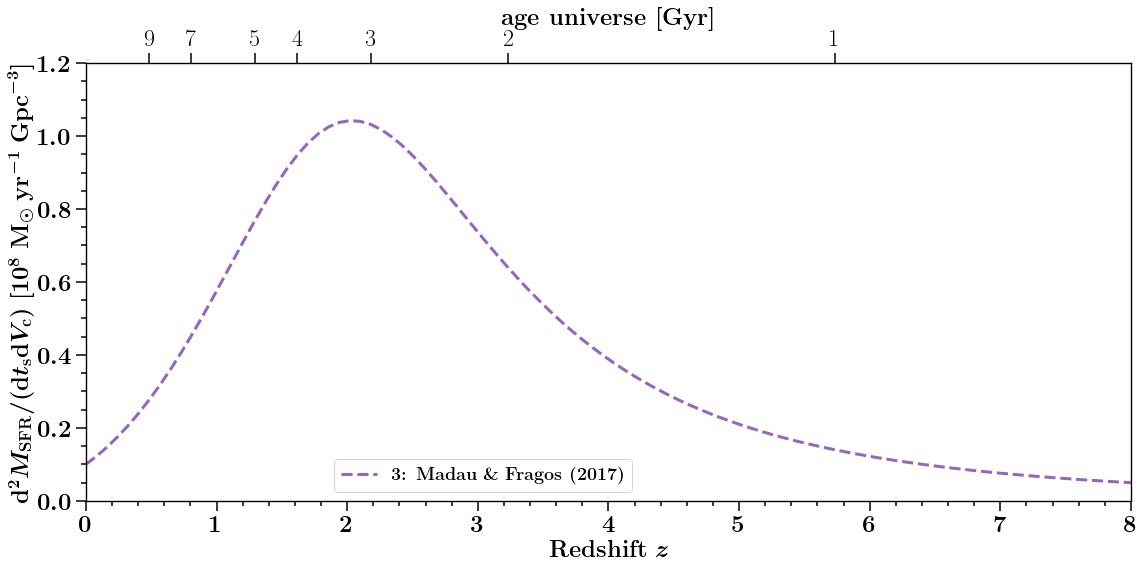

In [18]:
metallicityGrid = np.logspace(-4, -1.5,100)
MSSFR = ClassMSSFR.MSSFR(metallicityGrid=metallicityGrid)

# fontsize
fs = 20

clist=['#1f77b4', '#ff7f0e', '#d62728', '#9467bd'] 
#Plotting the SFR prescriptions
redshifts = np.linspace(0,8,100)
#strolger works in age not redshift
ages      = MSSFR.cosmology.age(redshifts).value

fig, axes = plt.subplots(1,1, figsize=(16,8))
# axes.plot(redshifts, MSSFR.SFR_Neijssel(redshifts), c=clist[0], lw=3., label=r'\textbf{0: Neijssel et al. (2019)}', linestyle='-')
# axes.plot(redshifts, MSSFR.SFR_Madau(redshifts),    c=clist[1], lw=3., label=r'\textbf{1: Madau }$\&$ \textbf{Dickinson (2014)}', linestyle='-.')
# axes.plot(redshifts, MSSFR.SFR_Strolger(ages),      c=clist[2], lw=3., label=r'\textbf{2: Strolger et al. (2004)}', linestyle=':')
axes.plot(redshifts, MSSFR.SFR_Madau2(redshifts),   c=clist[3], lw=3., label=r'\textbf{3: Madau }$\&$ \textbf{Fragos (2017)}', linestyle='--')


# axes and legend layout 
nameX = r'\textbf{Redshift} $z$'
nameY = r'$ {\rm{d}}^2M_{\rm{SFR}}/({\rm{d}}t_{{\rm{s}}}{\rm{d}}V_{\rm{c}}) \   [10^8\ {\rm{M}}_{\odot}\  {\rm{yr}}^{-1}\ {\rm{Gpc}}^{-3}]$'
axes.legend(loc=8, prop={'size':18}, bbox_to_anchor=(0.38, 0))
axes.yaxis.offsetText.set_fontsize(0.1)
axes.set_ylim(0, 1.2*10**8)
axes.set_xlabel(nameX, fontsize=fs+4)
axes.set_ylabel(nameY, fontsize=fs+4)
axes.tick_params(labelsize=fs+4)
axes.set_xlim(0,8)
layoutAxes(axes, nameX=nameX, nameY=nameY, fontsize=fs+4)


### second axis for age ###
axes2  = axes.twiny()
# axes2.plot(redshifts, MSSFR.SFR_Neijssel(redshifts), c=clist[0], lw=3., label='Preferred model')
#find nearest redshift to age
agelabels = np.array([1,2,3,4,5,7, 9]) #Gyr
ageUniverse = MSSFR.cosmology.age(0)
redshiftTicks = np.zeros(len(agelabels))
for nr, age in enumerate(agelabels):
    distance = np.abs(ages-age)
    ind      = np.where(distance==np.min(distance))[0][0]
    redshiftTicks[nr] =  redshifts[ind]

axes2.set_xticks(redshiftTicks)
axes2.set_xticklabels(agelabels)
nameX2 = r'\textbf{age universe [Gyr]}'

axes2.set_xlabel(nameX2, fontsize=fs+4)
axes2.tick_params(labelsize=fs+4)
layoutAxes(axes2, nameX=nameX2, nameY=None, fontsize=fs+4, setMinor=False)
axes2.set_xlim(0,8)
##

# save and show 
plt.tight_layout()
plt.savefig('/Users/floorbroekgaarden/Downloads/SFRplot.png', dpi=600,bbox_inches='tight')
# plt.savefig('./SFRplot.pdf',bbox_inches='tight')
plt.show()